In [10]:
#  This data was collected from the Actuaries Climate Index
#  http://actuariesclimateindex.org/home/
#  It is specifically showing changes in sea level averages by region by season in
#  the USA and Canada.

#  I will 'clean' the data by removing lots of rows and a few hundred columns of just 'Nan'
#  There are still some 'Nan' in upper left corner of dataframe that are distracting
#  and I'm struggling to remove.
#  Right now there are 2 sets of data in our dataframe, 'smoothed' and 'unsmoothed'
#  I'm only partially clear on what that means and so I'm going to eliminate the 'smoothed'
#  data because it was altered by some algorithm that I had no part in.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

sea_level_df = pd.read_csv(r'/Users/jdobrow/Desktop/data.csv')
#  There are some random rows in the middle without data, so I'm removing those here:
cleaned_rows_sea_level_df = sea_level_df.iloc[[5,6,9,11,12,14,15,16,17,18,19,20,21,22,23,26,28,29,31,32,33,34,35,36,37,38,39,40]]

#  Most of the columns are empty so I'm removing those here:
cleaned_sea_level_df = cleaned_rows_sea_level_df.iloc[:,1:234]

#  Here I set the column names as the year and then remove the top row
cleaned_sea_level_df.columns = cleaned_sea_level_df.iloc[0]
cleaned_sea_level_df = cleaned_sea_level_df.iloc[1:]

#  Here I set the row names and then remove the first column:
cleaned_sea_level_df.index = cleaned_sea_level_df.iloc[:,0]
cleaned_sea_level_df = cleaned_sea_level_df.iloc[:,1:]

cleaned_sea_level_df = cleaned_sea_level_df.iloc[0:14] #eliminated 'smoothed' data

In [18]:
cleaned_sea_level_df

5,1961.0,1961.0,1961.0,1961.0,1962.0,1962.0,1962.0,1962.0,1963.0,1963.0,...,2016.0,2016.0,2017.0,2017.0,2017.0,2017.0,2018.0,2018.0,2018.0,2018.0
nan,,,,,,,,,,,,,,,,,,,,,
NaN,1.00,2.00,3.00,4.00,1.00,2.00,3.00,4.00,1.00,2.00,...,3.00,4.00,1.00,2.00,3.00,4.00,1.00,2.00,3.00,4.00
ALA,1.78,1.62,1.57,0.43,0.00,0.33,0.90,1.36,0.60,0.76,...,-5.00,-3.23,-4.49,-5.90,-4.68,-4.53,-4.88,-7.26,-5.63,-4.70
CEA,-0.83,0.43,-1.68,-0.61,-0.75,-0.21,-0.92,-0.19,-1.32,-1.29,...,4.35,4.42,3.08,3.30,5.89,4.88,1.58,4.06,6.19,5.59
CWP,0.23,1.03,0.28,-1.57,-1.21,-0.28,-0.92,0.18,-1.05,0.39,...,0.30,3.09,0.98,2.74,1.69,1.03,-0.52,1.12,0.90,0.09
NEA,-0.26,0.45,-1.59,-1.95,-1.65,-0.10,-1.41,-1.09,-1.56,-1.67,...,3.85,3.37,4.36,3.18,4.12,3.22,3.58,3.18,4.12,3.22
NEF,-0.93,-0.20,0.22,-0.75,-1.21,-0.63,-0.88,-1.08,-2.04,-1.16,...,-0.35,-1.01,-0.09,1.59,1.60,0.59,-0.07,1.59,1.60,0.59
NPL,1.23,1.24,1.39,0.55,0.85,0.79,1.26,0.49,1.12,0.75,...,-2.63,-2.59,-2.11,-1.65,-1.80,-1.77,-2.09,-1.65,-1.80,-1.77
NWP,0.36,0.13,-0.02,-1.12,-0.65,-1.02,-0.46,0.43,-0.44,0.03,...,-0.97,2.45,0.59,2.39,0.36,0.31,0.15,2.39,0.36,0.31
SEA,-1.09,-0.78,-1.42,-0.57,-0.74,-0.72,-0.66,-1.09,-0.85,-1.85,...,4.77,4.87,3.21,2.94,5.09,4.77,2.33,3.48,4.36,4.68


In [14]:
#  The first row should be indexed 'season'. 1 = Winter, 2 = Spring, 3 = Summer, 4 = Fall
#  ALA = Alaska
#  CEA = Central East Atlantic
#  CWP = Central West Pacific
#  NEA = Northeast Atlantic
#  NEF = Northeast Forest
#  NPL = Northern Plains
#  NWP = Northwest Pacific
#  SEA = Southeast Atlantic
#  SPL = Southwest Pacific
#  USA = USA
#  CAN = Canada
#  USC = USA and Canada combined
#  **Note** There are 2 other regions exluded because they had no data:
#  the midwest and the mid arctic. I believe this is because they are land-locked.

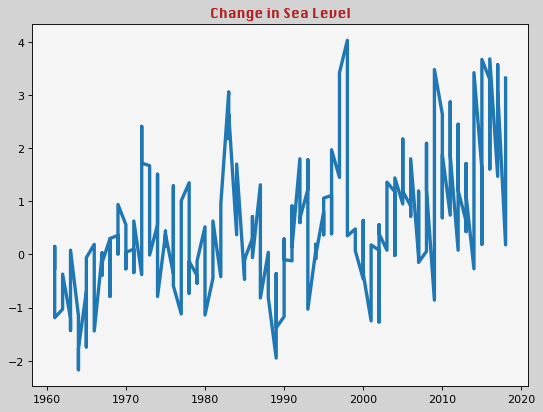

In [214]:
#  Change in Sea Level. A basic plot showing changes in sea level over the years from 1960 - 2019.
#  A general upward trend is not necessarily obvious at first glance, but the erratic nature
#  of the data is highlighted nicely here.
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='lightgrey', edgecolor='k')
plt.axes(fc = 'whitesmoke', )
plt.title('Change in Sea Level', color = 'firebrick', fontname = "Krungthep")
plt.plot(cleaned_sea_level_df.iloc[13], linewidth = 3)
plt.show()

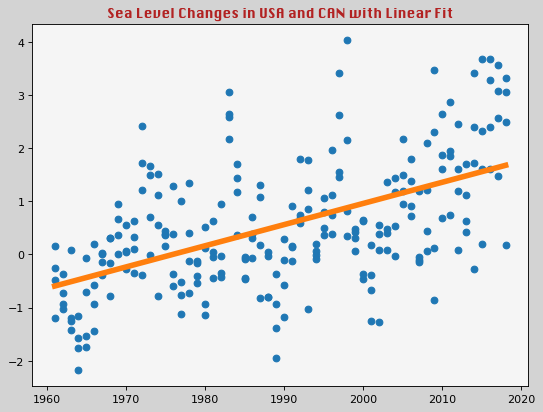

In [213]:
#  Thank you matplotlib.org and plot.ly/matplotlib for helping me with this.
#  I used the same data in a scatterplot this time, and imposed a line of best fit
#  over the data. This helps to clearly show that sea level changes are postive and
#  increasing over time.

from scipy import stats

xi = cleaned_sea_level_df.columns
y = cleaned_sea_level_df.iloc[13]
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor = 'lightgrey')
plt.axes(fc = 'whitesmoke', )
plt.plot(xi,y, 'o',xi,line, lw = 5)
plt.title('Sea Level Changes in USA and CAN with Linear Fit', color = 'firebrick', fontname = 'krungthep')
plt.show()

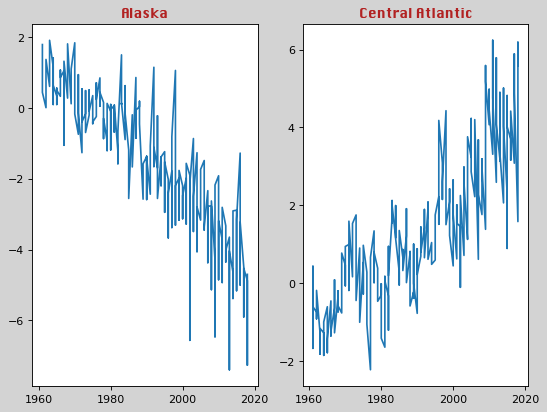

In [212]:
#  Next, I compare two specific regions of stations to highlight that
#  some stations are trending towards higher sea levels and others
#  are trendings towards lower. Note that these two clusters of
#  stations are on opposite sides of the continent. These graphs are
#  actually very misleading because the scales are shifted. They are more
#  aesthetically pleasing this way though.

plt.figure(figsize=(8,6), dpi = 80, facecolor = 'lightgrey')


plt.subplot(1, 2, 1)
plt.plot(cleaned_sea_level_df.iloc[1])
plt.title('Alaska', color = 'firebrick', fontname = 'krungthep')


plt.subplot (1, 2, 2)
plt.plot(cleaned_sea_level_df.iloc[2])
plt.title('Central Atlantic', color = 'firebrick', fontname = 'krungthep')

plt.show()


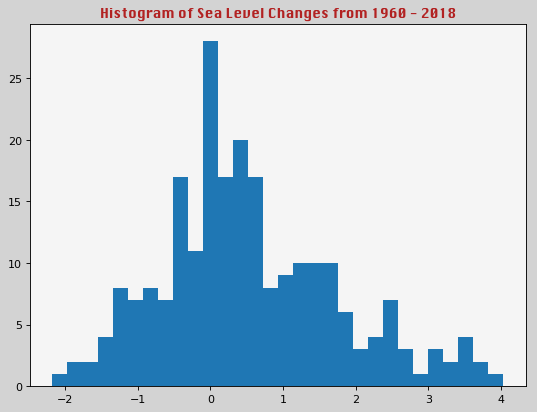

mean: 0.5414224137931035
standard deviation: 1.3305315569868803


In [226]:
#  Lastly I wanted to make a histogram and include basic descriptive statistics! A mean of .54
#  means that on average over the years 1960 - 2018 the sea level has increased .54/season. 
#  Standard deviation of 1.33 implies the data is varied. Visually there is an obvious skew in
#  the data towards seasons of large increase in sea level.

x = cleaned_sea_level_df.iloc[13]
plt.figure(figsize=(8,6), dpi = 80, facecolor = 'lightgrey')
plt.axes(fc = 'whitesmoke')
plt.hist(x, bins = 30)
plt.title("Histogram of Sea Level Changes from 1960 - 2018", color = 'firebrick', fontname = 'krungthep')
plt.show()

sum = 0
sum_squares = 0

for i in range(0, len(cleaned_sea_level_df.iloc[13])):
    sum += cleaned_sea_level_df.iloc[13,i]
mean = sum/len(cleaned_sea_level_df.iloc[13])

for i in range(0, len(cleaned_sea_level_df.iloc[13])):
    sum_squares += (cleaned_sea_level_df.iloc[13,i]) ** 2
standard_deviation = (sum_squares/len(cleaned_sea_level_df.iloc[13]))**(.5)
mean = sum/len(cleaned_sea_level_df.iloc[13])

print('mean: ' + str(mean))
print('standard deviation: ' + str(standard_deviation))